# SETUP

In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../fusion'))
module_path2 = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

if module_path2 not in sys.path:
    sys.path.append(module_path2)

# Setup Infersent

In [2]:
from embedding_algorithms.inferSent import set_RNN_embedding
start = time.time()
params = {}

model_type = "bilstm" 
char_level = False
model_version = 2
rnn_dim = 1024
verbose = 1
set_RNN_embedding(model_type, char_level, model_version, rnn_dim, verbose)
print("TIME: {0}".format(time.time() - start))

params['embedding'] = {
    'name': 'Infersent',
    'model_type': model_type,
    'char_level': char_level,
    'model_version': model_version,
    'rnn_dim': rnn_dim,
    'verbose': verbose
}

Vocab size : 2196017
TIME: 178.44016313552856


# Import dataset

In [3]:
from preprocessing_datasets.preprocessing_book import *
data = set_clean_book()
data

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
0,0,0000219118,ground-zero-books%2c-ltd-silver-spring/62893/sf,history-books,"['Association for Asian Studies, Inc']","['association for asian studies, inc']",asian association for inc studies,"The Journal of Asian Studies, Volume 47, Numbe..."
1,1,0000219118,pursuit-of-happiness-books-oakland-ca/81375/sf,history-books,"['The Association for Asian Studies, Inc']","['the association for asian studies, inc']",asian association for inc studies the,The Journal of Asian Studies
2,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",c d mildenhall,Late Oligocene - Early Miocene Spores and Poll...
3,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",d pocknall t,Late Oligocene - Early Miocene Spores and Poll...
4,3,0000788589,arty-bees-books-wellington/6226172/sf,science-books,"['Buckeridge, John Stewart']","['buckeridge, john stewart']",buckeridge john stewart,Fossil Barnacles (Cirripedia: Thoracica) of Ne...
...,...,...,...,...,...,...,...,...
2199026,1891013,9994533150,mark-henderson-olathe-ks-u.s.a/2095040/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199027,1891014,9994533150,owlsbooks-toledo-md-u.s.a/51218811/sf,literature,['Clara Lee Tanner'],['clara lee tanner'],clara lee tanner,Indian Arts and Crafts
2199028,1891015,9994533150,second-city-books-aurora-il-u.s.a/63477172/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199029,1891016,9998111552,dogstar-books-lancaster-pa-u.s.a/50869000/sf,history-books,"['Nixon, Richard M.']","['nixon, richard m.']",m nixon richard,RN; The Memoirs of Richard Nixon


## CASE1 

In [24]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0810932776')

In [25]:
table_ISBN

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
1605039,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",igor lysenko,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605040,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",atonina bouis w,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605041,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",egorov georgy,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605042,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",marian schwartz,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605043,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",petrov vadim,"The Escape of Alexei, Son of Tsar Nicholas II:..."
...,...,...,...,...,...,...,...,...
1605965,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",igor lysenko,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605966,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",atonina bouis w,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605967,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",egorov georgy,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605968,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",marian schwartz,"The Escape of Alexei, Son of Tsar Nicholas II:..."


In [26]:
table_ISBN['oldAuthor'].value_counts() #first 5

petrov vadim                     213
egorov georgy                    177
igor lysenko                     145
marian schwartz                   81
atonina bouis w                   77
b egorov g                        32
petrov v                          30
i lysenko v                       26
b egorov georgy                   24
abrams harry n                    22
igor lysenko v                    22
igor lysenho                      20
petrov vadim vadimovich           20
igor lysenki                      12
egorov georg                       2
antonina bovis                     2
igor lyseno                        2
others                             2
lysenho                            2
perov vadim                        2
egoroy georgy                      2
lysenko                            2
egorov                             2
egorov g i lysenko petrov v        2
petrov                             2
petrov yadim                       2
igor lysenkho                      2
p

In [27]:
column = table_ISBN['oldAuthor'].tolist()

In [28]:
import random
def random_color(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    return r,g,b

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [29]:
from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['oldAuthor','title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['oldAuthor', 'title']


In [36]:
from sklearn.decomposition import PCA


pca_model = PCA(n_components=2, random_state=88)

pca_embeddings = pca_model.fit_transform(embeddings_tokens)


params['reduction'] = {
    'name': 'PCA',
    'num_components': 2,
    'verbose': 1,
}

rows: 931
classes: 931


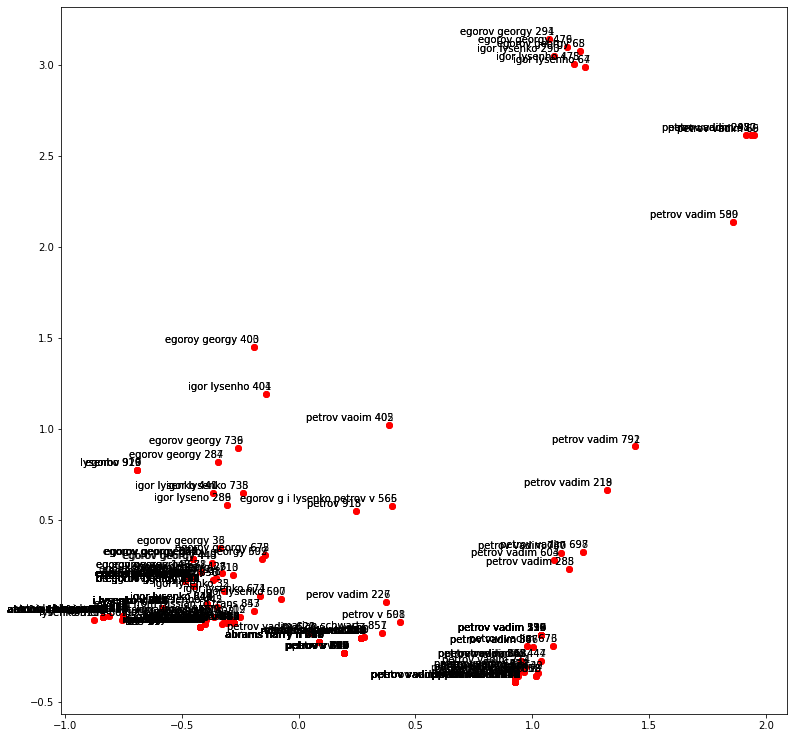

In [37]:
x = []
y = []
for emb in pca_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [38]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(pca_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


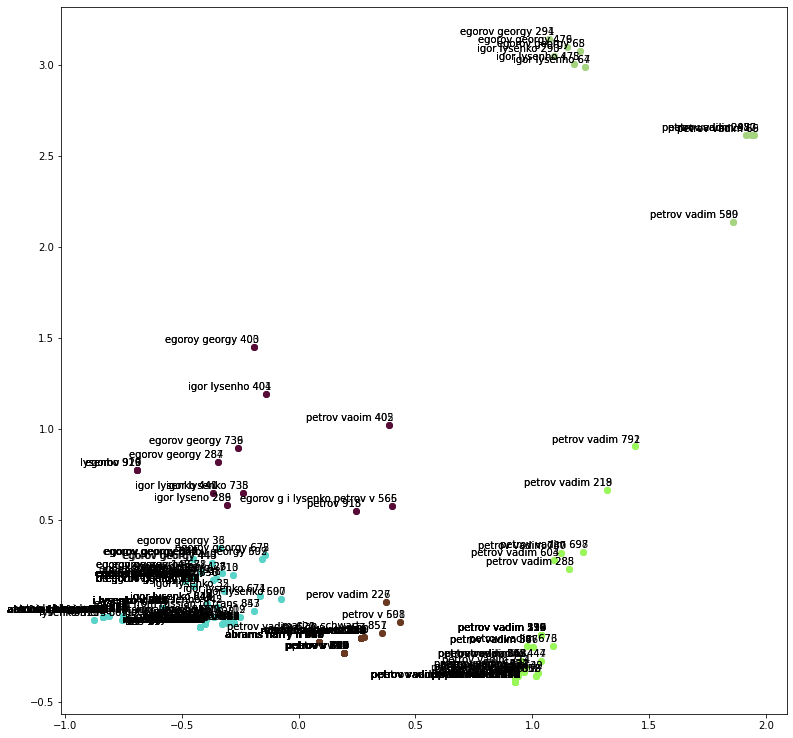

In [39]:
x_blocks = []
y_blocks = []
for emb in pca_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

In [40]:
from cluster_algorithms.algorithm_utilities import clusterArray_to_blockDict
from sklearn.cluster import DBSCAN



# CLUSTERING
clustering = DBSCAN(eps=0.5, min_samples=5)
assigned_clusters = clustering.fit_predict(pca_embeddings)
block = clusterArray_to_blockDict(assigned_clusters)
print(len(block))

4


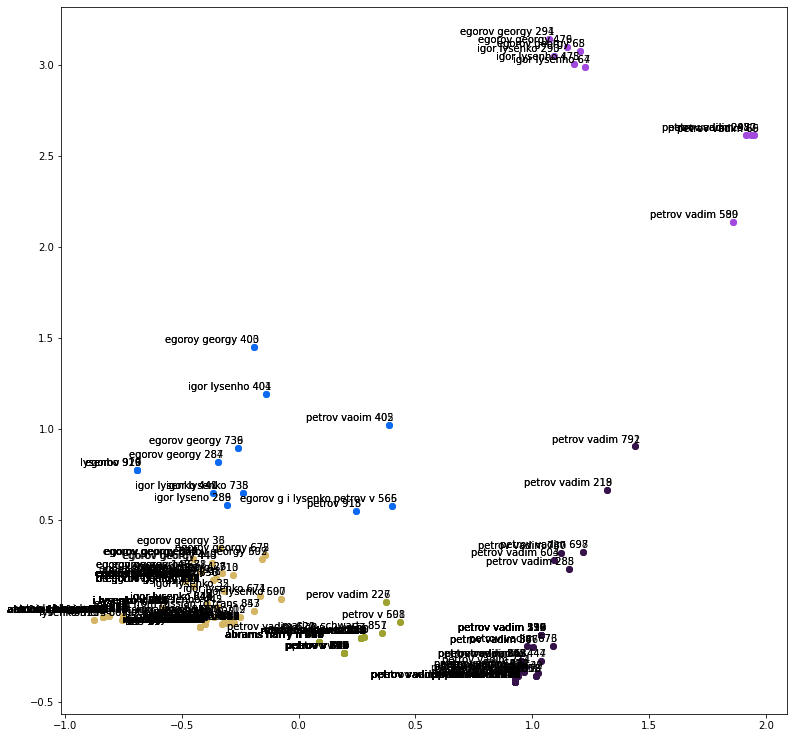

In [42]:
x_blocks = []
y_blocks = []
for emb in pca_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## TSNE

In [43]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
        perplexity=10, 
        n_components=2, 
        method='barnes_hut',
        early_exaggeration=12,
        init='pca', 
        n_iter=2500, 
        random_state=23
    )


tsne_embeddings = tsne_model.fit_transform(embeddings_tokens)

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

rows: 931
classes: 931


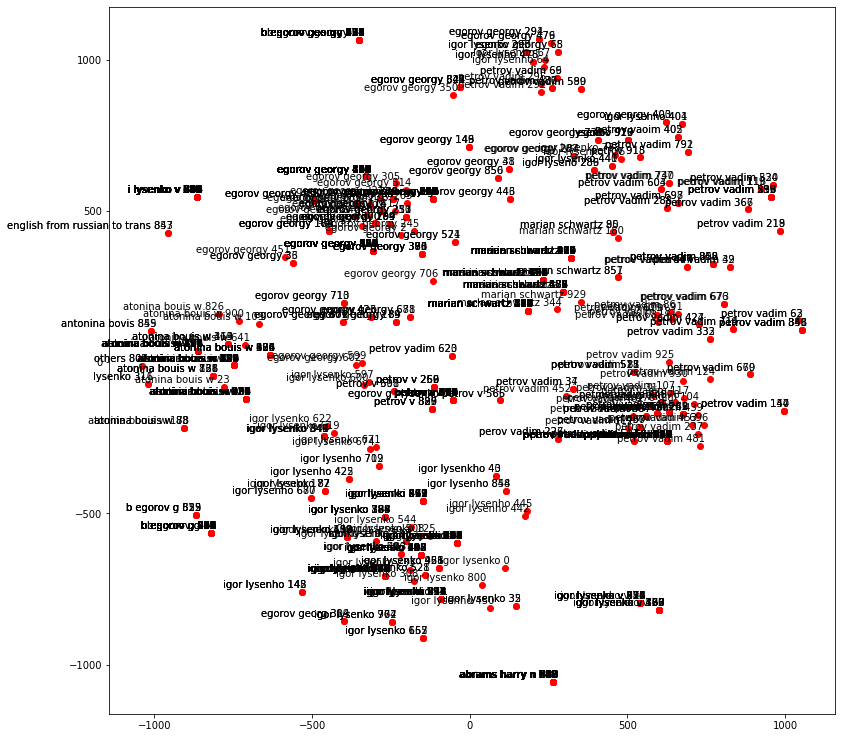

In [44]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [45]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
        perplexity=30, 
        n_components=2, 
        method='barnes_hut',
        early_exaggeration=12,
        init='pca', 
        n_iter=2500, 
        random_state=23
    )


tsne_embeddings = tsne_model.fit_transform(embeddings_tokens)

rows: 931
classes: 931


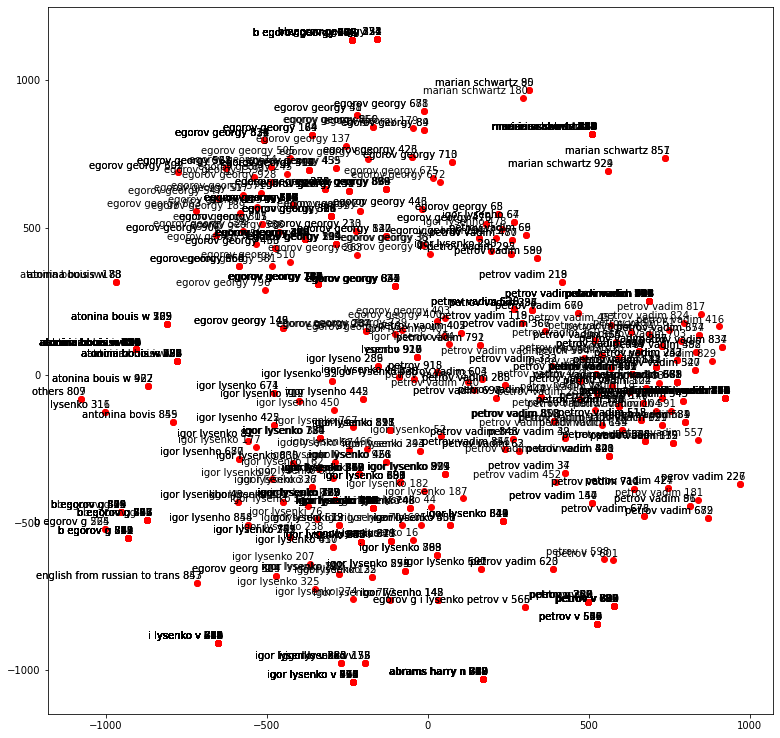

In [46]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [51]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(pca_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


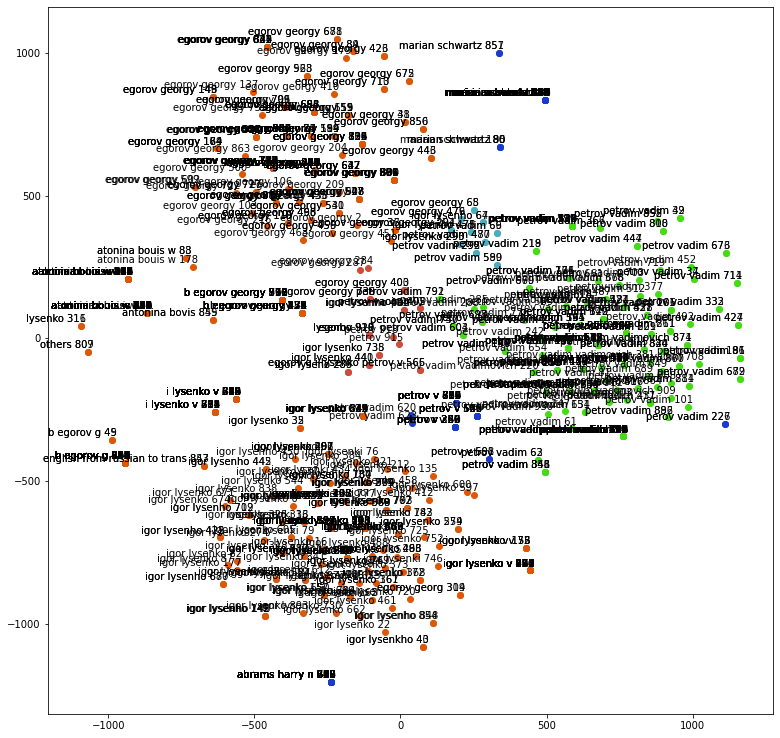

In [52]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

In [53]:
from cluster_algorithms.algorithm_utilities import clusterArray_to_blockDict
from sklearn.cluster import DBSCAN



# CLUSTERING
clustering = DBSCAN(eps=0.5, min_samples=5)
assigned_clusters = clustering.fit_predict(pca_embeddings)
block = clusterArray_to_blockDict(assigned_clusters)
print(len(block))

4


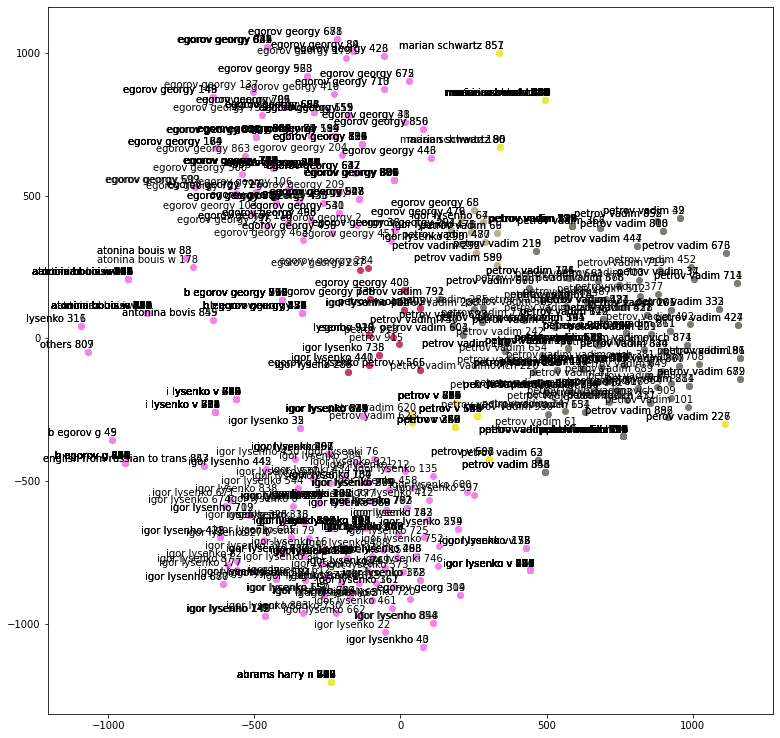

In [55]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()